## CBN - Causal Bayesian Networks

Causal Bayesian Networks (CBNs) are **probabilistic graphical models** that represent a set of variables and their causal relationships using a directed acyclic graph (DAG). Each node in the graph corresponds to a variable, and edges indicate direct causal influence from one variable to another. CBNs allow us to model, reason about, and infer the effects of interventions and changes in a system, making them powerful tools for understanding causality in complex domains.


 ## Assumptions of Causal Bayesian Networks (CBNs)
 
 When using Causal Bayesian Networks, several key assumptions are typically made:
 
 1. **Causal Markov Condition:** Each variable is independent of its non-effects (non-descendants) given its direct causes (parents) in the network.
 2. **Faithfulness (Stability):** All and only the conditional independencies present in the probability distribution are entailed by the structure of the graph.
 3. **Acyclicity:** The causal relationships are represented by a Directed Acyclic Graph (DAG), meaning there are no cycles.
 4. **Causal Sufficiency:** All common causes of the variables in the model are included in the network (i.e., no unmeasured confounders).
 5. **Correct Model Specification:** The structure of the network and the conditional probability distributions are correctly specified.
 
 Violations of these assumptions can lead to incorrect causal inferences. It is important to carefully consider whether these assumptions are reasonable for the domain and data at hand.


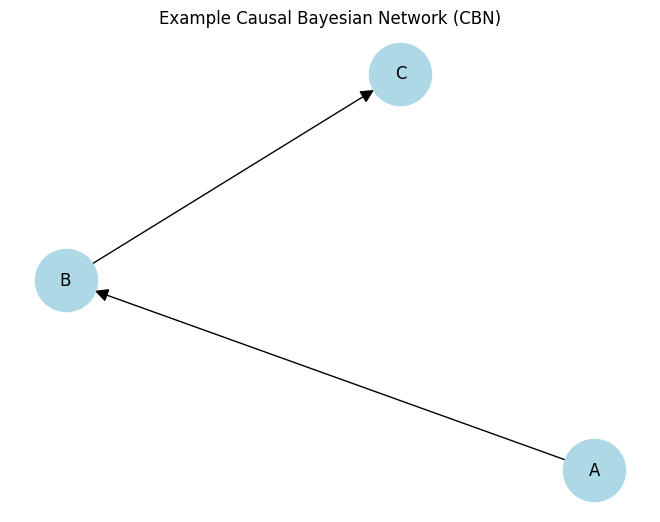

In [1]:
# Example: Simple Causal Bayesian Network (CBN)
# Let's define a simple CBN with three variables: A, B, and C
# A -> B -> C

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
cbn = nx.DiGraph()

# Add nodes
cbn.add_nodes_from(['A', 'B', 'C'])

# Add edges to represent causal relationships
cbn.add_edges_from([('A', 'B'), ('B', 'C')])

# Draw the CBN
pos = nx.spring_layout(cbn)
nx.draw(cbn, pos, with_labels=True, node_color='lightblue', node_size=2000, arrowsize=20)
plt.title("Example Causal Bayesian Network (CBN)")
plt.show()

 ## Use Cases of Causal Bayesian Networks (CBNs)
 
 Causal Bayesian Networks are widely used in various domains to model and reason about causality. Some common use cases include:
 
 - **Healthcare and Medicine:** Understanding the causal relationships between risk factors, diseases, and treatments to improve diagnosis and intervention strategies.
 - **Epidemiology:** Modeling the spread of diseases and the impact of interventions (e.g., vaccination campaigns).
 - **Economics and Social Sciences:** Analyzing the effects of policies, economic variables, and social interventions.
 - **Genetics and Biology:** Inferring gene regulatory networks and understanding causal pathways in biological systems.
 - **Artificial Intelligence and Machine Learning:** Enhancing decision-making systems by incorporating causal reasoning, improving explainability, and enabling counterfactual analysis.
 - **Fault Diagnosis:** Identifying root causes of failures in engineering systems and complex machinery.
 
 CBNs are powerful tools for answering "what if" questions, predicting the effects of interventions, and uncovering hidden causal structures in data.




 ## Pros and Cons of Causal Bayesian Networks (CBNs)
 
 **Pros:**
 - **Causal Reasoning:** CBNs explicitly model causal relationships, allowing for reasoning about interventions and counterfactuals.
 - **Interpretability:** The graphical structure makes it easier to understand dependencies and causal pathways between variables.
 - **Handling Uncertainty:** CBNs are probabilistic, so they naturally handle uncertainty and incomplete information.
 - **Predictive Power:** They can be used to predict the effects of changes or interventions in a system.
 - **Modularity:** CBNs can be extended or modified as new variables or relationships are discovered.
 
 **Cons:**
 - **Requires Expert Knowledge:** Building an accurate CBN often requires domain expertise to specify the correct structure and relationships.
 - **Scalability:** For large and complex systems, the number of possible structures grows rapidly, making learning and inference computationally challenging.
 - **Data Demands:** Learning both the structure and parameters of a CBN from data can require large datasets, especially when many variables are involved.
 - **Assumptions:** CBNs rely on assumptions such as the absence of hidden confounders and the correctness of the DAG structure, which may not always hold in practice.
 - **Difficulty with Cyclic Relationships:** CBNs are restricted to acyclic graphs, so they cannot directly represent feedback loops or cyclic causality.


## variable eliminaiton method

 
 Variable elimination is an exact inference algorithm used in Causal Bayesian Networks (CBNs) and general Bayesian networks to efficiently compute the probability of a query variable given some evidence. 
 
 The method works by systematically summing out (eliminating) the non-query, non-evidence variables from the joint probability distribution, using the network's factorization. This is done by:
 1. Representing the network as a set of factors (conditional probability tables).
 2. Multiplying relevant factors together.
 3. Marginalizing (summing out) variables that are not of interest, one at a time, in a specific order.
 
 Variable elimination reduces redundant calculations by reusing intermediate results, making it more efficient than brute-force enumeration. It is widely used for probabilistic inference, such as computing marginal probabilities or the effect of interventions in CBNs.


In [4]:
import numpy as np

# Example Bayesian Network:
# A -> B -> C
# P(A), P(B|A), P(C|B)

# Define the conditional probability tables (CPTs)
P_A = {
    0: 0.2,  # P(A=0)
    1: 0.8   # P(A=1)
}

P_B_given_A = {
    (0, 0): 0.7,  # P(B=0|A=0)
    (0, 1): 0.3,  # P(B=1|A=0)
    (1, 0): 0.2,  # P(B=0|A=1)
    (1, 1): 0.8   # P(B=1|A=1)
}

P_C_given_B = {
    (0, 0): 0.9,  # P(C=0|B=0)
    (0, 1): 0.1,  # P(C=1|B=0)
    (1, 0): 0.4,  # P(C=0|B=1)
    (1, 1): 0.6   # P(C=1|B=1)
}

# Goal: Compute P(C=1) using variable elimination

# Step 1: Write the joint distribution
# P(A, B, C) = P(A) * P(B|A) * P(C|B)

# Step 2: Marginalize out A and B to get P(C)
def variable_elimination_C1():
    prob_C1 = 0.0
    for a in [0, 1]:
        for b in [0, 1]:
            p_a = P_A[a]
            p_b_given_a = P_B_given_A[(a, b)]
            p_c1_given_b = P_C_given_B[(b, 1)]
            prob = p_a * p_b_given_a * p_c1_given_b
            print(f"P(C=1, A={a}, B={b}) = {prob}")
            prob_C1 += prob
    return prob_C1
print("--------------------------------")
result = variable_elimination_C1()
print("--------------------------------")
print("P(C=1) =", result)

# Example output: P(C=1) = 0.44


--------------------------------
P(C=1, A=0, B=0) = 0.013999999999999999
P(C=1, A=0, B=1) = 0.036
P(C=1, A=1, B=0) = 0.016000000000000004
P(C=1, A=1, B=1) = 0.38400000000000006
--------------------------------
P(C=1) = 0.45000000000000007
